In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
import seaborn as sns

In [ ]:
genebod=pd.read_csv("non_prom_locs.txt", header=None, names=["loc"])
prom=pd.read_csv("prom_locs.txt", header=None, names=["loc"])
all_loc=pd.read_csv("all_locs.txt", header=None, names=["loc"])

# Selecting threshold

In [ ]:
exp=pd.read_csv("TPMs.tsv", sep="\t") # downloaded from Echinobase FTP
exp["ID"]=exp["transcript_id"].str.split(".",expand=True)[0]

In [ ]:
texp=exp.groupby("gene_id").max() # Necessary since we choose the transcript with the highest expression for the outlier genes too
texp["sum"]=texp['0'] + texp['10'] + texp['18'] + texp['24'] + texp['30'] + texp['40'] + texp['48'] + texp['56'] + texp['64'] + texp['72']

confs=np.array([conf for conf in texp["sum"]])
confs = np.sort(confs)

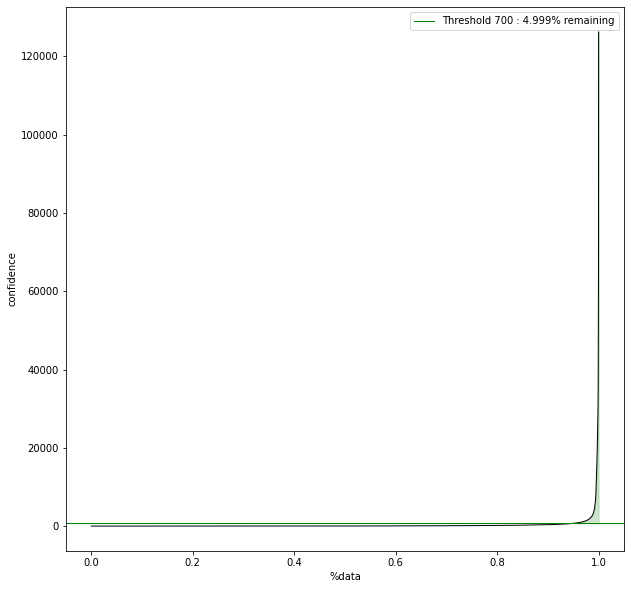

In [ ]:
thresh=700
plt.figure(figsize=(10,10))
xs = np.linspace(0,1,len(confs))
plt.plot(xs,confs,
         lw=1,
         color="black")
plt.xlabel("%data")
plt.ylabel("confidence")
plt.axhline(thresh,
            label=f"Threshold {thresh} : {len(confs[confs > thresh])/len(confs)*100:.3f}% remaining",
            lw=1,
            color="green")
plt.fill_between(xs, confs, thresh, 
                 where=confs > thresh,
                 alpha=.2,
                 color="green")
plt.legend()

In [ ]:
rnamap=pd.read_csv("NcbiMrnaEchinobaseGene_Spur.txt", sep="\t", header=None, names=["t","t2","genepage","LOC"]) # downloaded from Echinobase FTP

In [ ]:
def get_expression(df):
  present=0
  absent=0
  # Get all transcript IDs for LOCs
  rna=[]
  for i in df["loc"].unique():
    temp=rnamap[rnamap["LOC"]==i]
    if len(temp) > 0:
      present+=1
      trs=temp.iloc[:,1].array
      #print(trs)
      mlist=[]
      for t in trs:
        if (t.split("_")[0] == "XM") or (t.split("_")[0] == "NM"):
          mlist.append(t)
      rna.append(mlist)
    else:
      absent+=1

  # Select transcript with the most expression as representative for the gene
  newdf=pd.DataFrame()
  for r in rna:
    #print(r)
    if len(r) > 1:
      max=0
      maxid=0
      for i in range(len(r)):
        temp=exp[exp["ID"]==r[i]]
        if len(temp) > 0:
          temp['sum'] = temp['0'] + temp['10'] + temp['18'] + temp['24'] + temp['30'] + temp['40'] + temp['48'] + temp['56'] + temp['64'] + temp['72']
          #print(temp)
          if temp.iloc[0,13] >= max: # keep transcript with the highest count, = for the case when first i in r not found in exp...
            max=temp.iloc[0,13]
            maxid=i
        else:
          print("check this out")
          print(r)
      newdf=newdf.append(exp[exp["ID"]==r[maxid]])
    else:
      #print(exp[exp["ID"]==r[0]])
      if len(r) > 0:
        temp=exp[exp["ID"]==r[0]]
        newdf=newdf.append(temp)

  newdf["sum"]=newdf['0'] + newdf['10'] + newdf['18'] + newdf['24'] + newdf['30'] + newdf['40'] + newdf['48'] + newdf['56'] + newdf['64'] + newdf['72']
  print(present)
  print(absent)
  return(newdf)

# Analysis

In [ ]:
thres=700

In [ ]:
test_exp=get_expression(all_loc)

In [ ]:
print('72 hours, found')
print(len(test_exp[test_exp["sum"]>thres])/len(test_exp)) #percent expressed within 72hpf
print('72 hours, expected')
print(len(texp[texp["sum"]>thres])/len(texp)) #percent expressed within 72hpf
print("more found than expected?")
print(stats.binom_test(len(test_exp[test_exp["sum"]>thres]), n=len(test_exp), p=len(texp[texp["sum"]>thres])/len(texp), alternative='greater'))
print("less found than expected?")
print(stats.binom_test(len(test_exp[test_exp["sum"]>thres]), n=len(test_exp), p=len(texp[texp["sum"]>thres])/len(texp), alternative='less'))

72 hours, found
0.05166553365057784
72 hours, expected
0.04999241159508271
more found than expected?
0.35011917268042253
less found than expected?
0.6803601484699788


In [ ]:
test_exp["sum"]=test_exp['0'] + test_exp['10'] + test_exp['18'] + test_exp['24'] + test_exp['30'] + test_exp['40'] + test_exp['48']
texp["sum"]=texp['0'] + texp['10'] + texp['18'] + texp['24'] + texp['30'] + texp['40'] + texp['48'] 

print('48 hours, found')
print(len(test_exp[test_exp["sum"]>thres])/len(test_exp)) #percent expressed within 72hpf
print('48 hours, expected')
print(len(texp[texp["sum"]>thres])/len(texp)) #percent expressed within 72hpf
print("more found than expected?")
print(stats.binom_test(len(test_exp[test_exp["sum"]>thres]), n=len(test_exp), p=len(texp[texp["sum"]>thres])/len(texp), alternative='greater'))
print("less found than expected?")
print(stats.binom_test(len(test_exp[test_exp["sum"]>thres]), n=len(test_exp), p=len(texp[texp["sum"]>thres])/len(texp), alternative='less'))


48 hours, found
0.03602991162474507
48 hours, expected
0.03876157231749886
more found than expected?
0.7911811910727937
less found than expected?
0.2379896786014031


In [ ]:
test_exp["sum"]=test_exp['0'] + test_exp['10'] + test_exp['18'] + test_exp['24'] 
texp["sum"]=texp['0'] + texp['10'] + texp['18'] + texp['24']  

print('24 hours, found')
print(len(test_exp[test_exp["sum"]>thres])/len(test_exp)) #percent expressed within 72hpf
print('24 hours, expected')
print(len(texp[texp["sum"]>thres])/len(texp)) #percent expressed within 72hpf
print("more found than expected?")
print(stats.binom_test(len(test_exp[test_exp["sum"]>thres]), n=len(test_exp), p=len(texp[texp["sum"]>thres])/len(texp), alternative='greater'))
print("less found than expected?")
print(stats.binom_test(len(test_exp[test_exp["sum"]>thres]), n=len(test_exp), p=len(texp[texp["sum"]>thres])/len(texp), alternative='less'))


24 hours, found
0.01971447994561523
24 hours, expected
0.02513279708605251
more found than expected?
0.9769412610936353
less found than expected?
0.03095020852077597


In [ ]:
exp_list=test_exp[test_exp["sum"]>700].gene_id.unique()
#exp_list=[e.split("C")[1] for e in exp_list]
#exp_list

In [ ]:
# looking for exonic variants
ens=pd.read_csv("ensembl_annotation_outliers_pairFST.txt",sep="\t") #results based on Variant Effect Predictor available on EnsemblMetazoa
ens

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,Codons,Existing_variation,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,CLIN_SIG,SOMATIC,PHENO
0,.,NC_001453.1:3737-3737,G,downstream_gene_variant,MODIFIER,ND1,GeneID_2652716,Transcript,GeneID_2652716_df_mr,protein_coding,...,-,-,607,1,-,Ensembl_Metazoa,-,-,-,-
1,.,NC_001453.1:3737-3737,G,synonymous_variant,LOW,ND2,GeneID_2652717,Transcript,GeneID_2652717_df_mr,protein_coding,...,ttA/ttG,-,-,1,-,Ensembl_Metazoa,-,-,-,-
2,.,NC_001453.1:3737-3737,G,upstream_gene_variant,MODIFIER,COX1,GeneID_2652718,Transcript,GeneID_2652718_df_mr,protein_coding,...,-,-,2048,1,-,Ensembl_Metazoa,-,-,-,-
3,.,NC_001453.1:3737-3737,G,upstream_gene_variant,MODIFIER,ND4L,GeneID_2652719,Transcript,GeneID_2652719_df_mr,protein_coding,...,-,-,3681,1,-,Ensembl_Metazoa,-,-,-,-
4,.,NC_001453.1:3737-3737,G,upstream_gene_variant,MODIFIER,COX2,GeneID_2652720,Transcript,GeneID_2652720_df_mr,protein_coding,...,-,-,3974,1,-,Ensembl_Metazoa,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18262,.,NW_022145615.1:35067778-35067778,T,downstream_gene_variant,MODIFIER,-,LOC578459,Transcript,XM_030976809,protein_coding,...,-,-,4451,1,-,-,-,-,-,-
18263,.,NW_022145615.1:35067778-35067778,T,intron_variant,MODIFIER,-,LOC578527,Transcript,XM_030976811,protein_coding,...,-,-,-,-1,-,-,-,-,-,-
18264,.,NW_022145615.1:35067778-35067778,T,downstream_gene_variant,MODIFIER,-,LOC578527,Transcript,XM_030976812,protein_coding,...,-,-,3916,-1,-,-,-,-,-,-
18265,.,NW_022145615.1:35067778-35067778,T,downstream_gene_variant,MODIFIER,-,LOC578527,Transcript,XM_030976813,protein_coding,...,-,-,2879,-1,-,-,-,-,-,-


In [ ]:
effects=[]
for e in exp_list:
  #gene="GeneID_" + str(e)
  #print(gene)
  tmp=ens[ens["Gene"]==e]
  if len(tmp) > 0:
    #print(tmp.Consequence.values)
    effects.append(tmp.Consequence.values)
    #break

In [ ]:
effects=[l.tolist() for l in effects]

In [ ]:
effects=[x for xs in effects for x in xs]

In [ ]:
from collections import Counter
counts = Counter(effects)
counts

Counter({'3_prime_UTR_variant': 66,
         '5_prime_UTR_variant': 36,
         'downstream_gene_variant': 41,
         'intron_variant': 524,
         'intron_variant,non_coding_transcript_variant': 3,
         'missense_variant': 11,
         'non_coding_transcript_exon_variant': 2,
         'splice_polypyrimidine_tract_variant,intron_variant': 1,
         'splice_polypyrimidine_tract_variant,splice_region_variant,intron_variant': 2,
         'synonymous_variant': 102,
         'upstream_gene_variant': 28})